## Loading Dataframe

In [39]:
import pandas as pd 
df=pd.read_csv("train.csv")

## Shape of Dataset

In [40]:
rows,columns=df.shape
print(rows,columns)

103904 25


## Datatypes

In [41]:
df.dtypes

Unnamed: 0                             int64
id                                     int64
Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure 

In [42]:
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [43]:
df.isnull().sum()

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction    

In [44]:
df.nunique()

Unnamed: 0                           103904
id                                   103904
Gender                                    2
Customer Type                             2
Age                                      75
Type of Travel                            2
Class                                     3
Flight Distance                        3802
Inflight wifi service                     6
Departure/Arrival time convenient         6
Ease of Online booking                    6
Gate location                             6
Food and drink                            6
Online boarding                           6
Seat comfort                              6
Inflight entertainment                    6
On-board service                          6
Leg room service                          6
Baggage handling                          5
Checkin service                           6
Inflight service                          6
Cleanliness                               6
Departure Delay in Minutes      


Gender diagram:
Gender
Female    52727
Male      51177
Name: count, dtype: int64


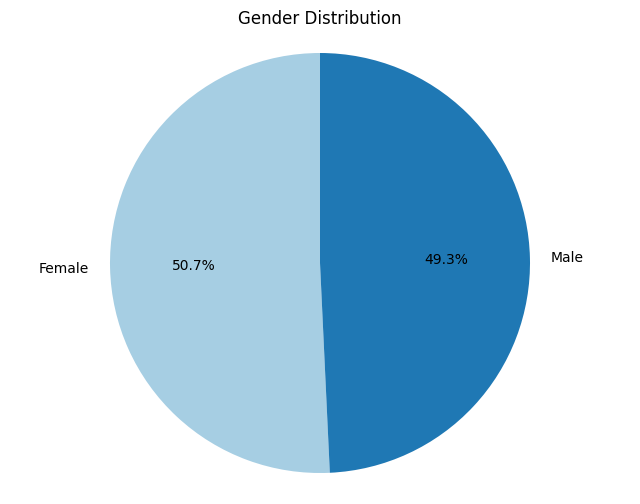


Customer Type diagram:
Customer Type
Loyal Customer       84923
disloyal Customer    18981
Name: count, dtype: int64


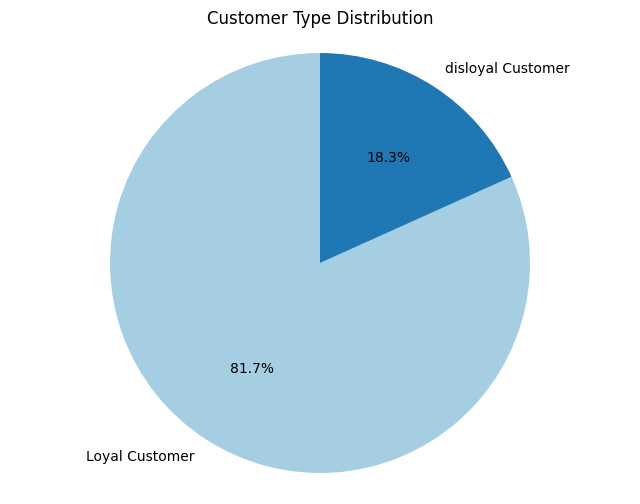


Type of Travel diagram:
Type of Travel
Business travel    71655
Personal Travel    32249
Name: count, dtype: int64


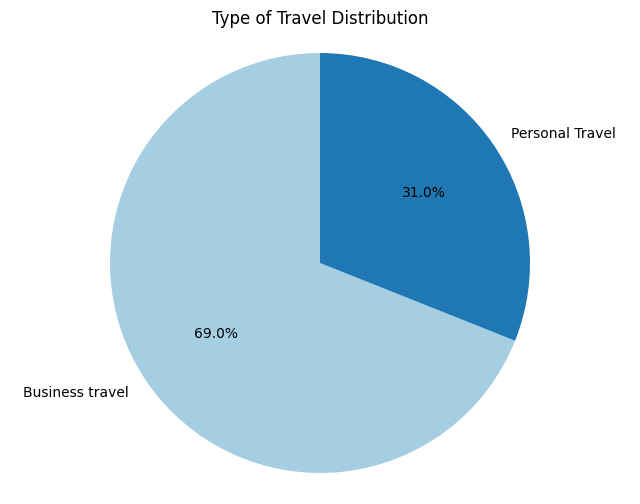


Class diagram:
Class
Business    49665
Eco         46745
Eco Plus     7494
Name: count, dtype: int64


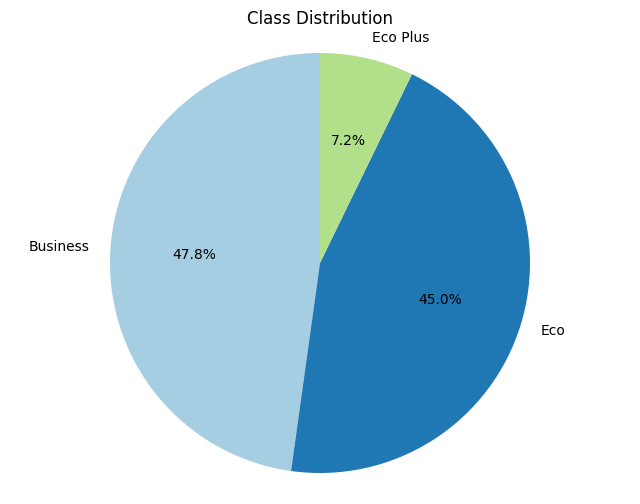


satisfaction diagram:
satisfaction
neutral or dissatisfied    58879
satisfied                  45025
Name: count, dtype: int64


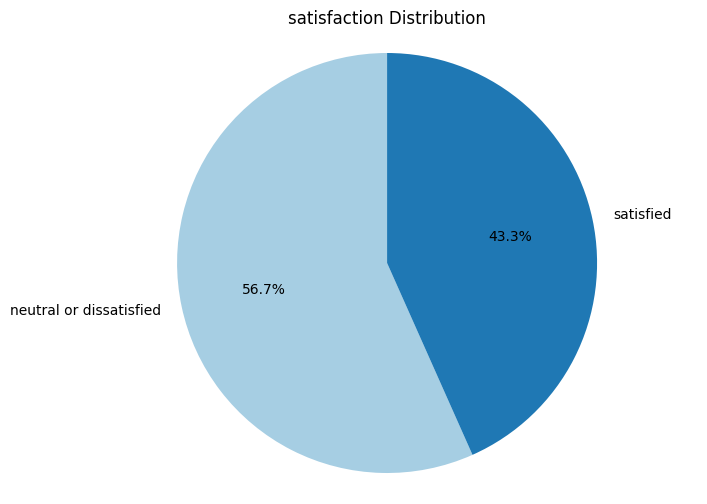

In [45]:
import matplotlib.pyplot as plt

cat_cols = ['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction']
for col in cat_cols:
    print(f"\n{col} diagram:")
    print(df[col].value_counts())
    
    # Create a pie chart
    plt.figure(figsize=(8, 6))
    df[col].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
    plt.title(f'{col} Distribution')
    plt.ylabel('')  # Remove y-label for cleaner look
    plt.axis('equal')  # Equal aspect ratio ensures pie is circular
    plt.show()


Numerical Feature Distributions:


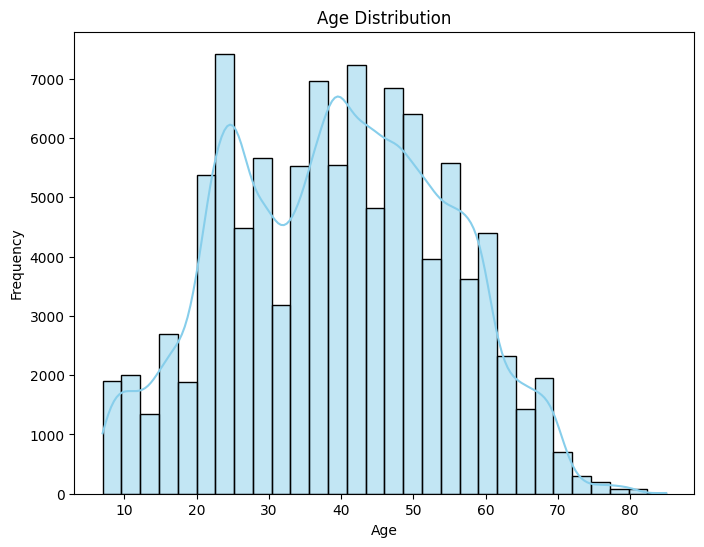

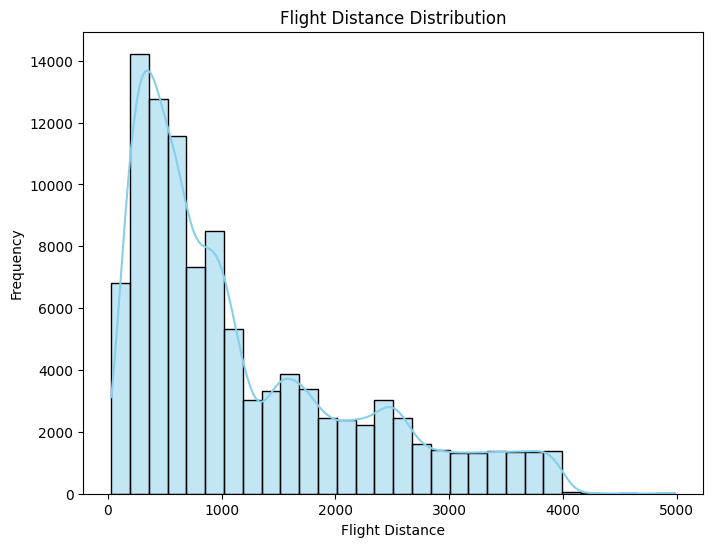

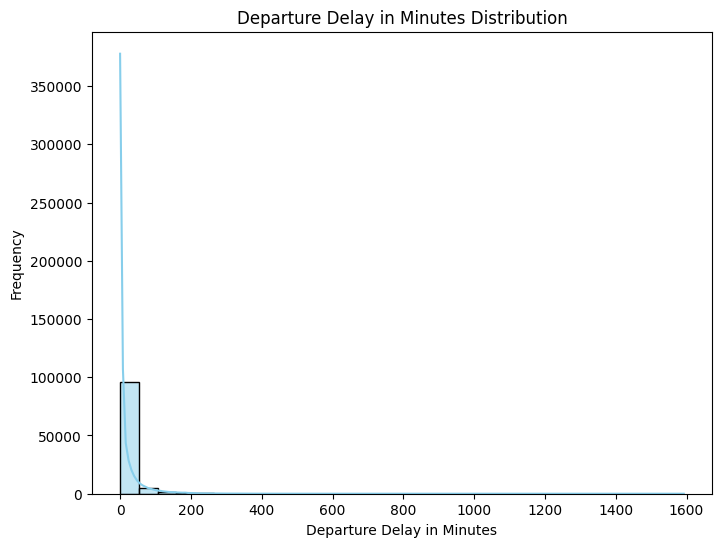

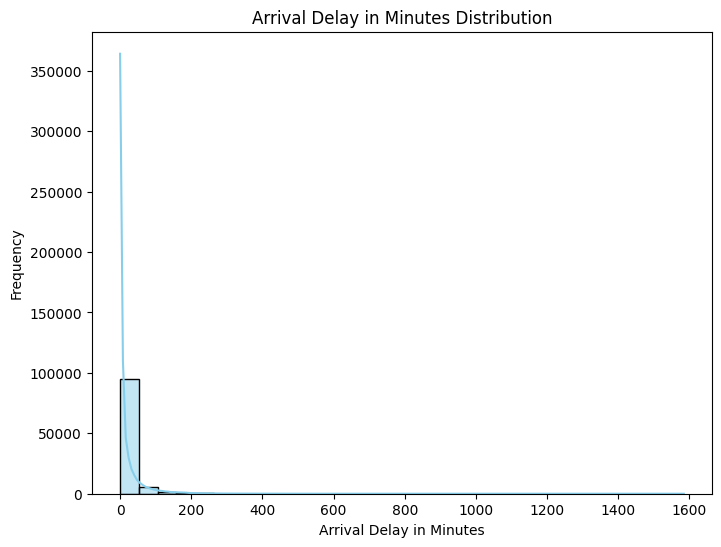

In [46]:
import seaborn as sns
num_cols = ['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']
print("\nNumerical Feature Distributions:")
for col in num_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[col], bins=30, kde=True, color='skyblue')
    plt.title(f'{col} Distribution')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

## Boxx plot for Numeric Cols 

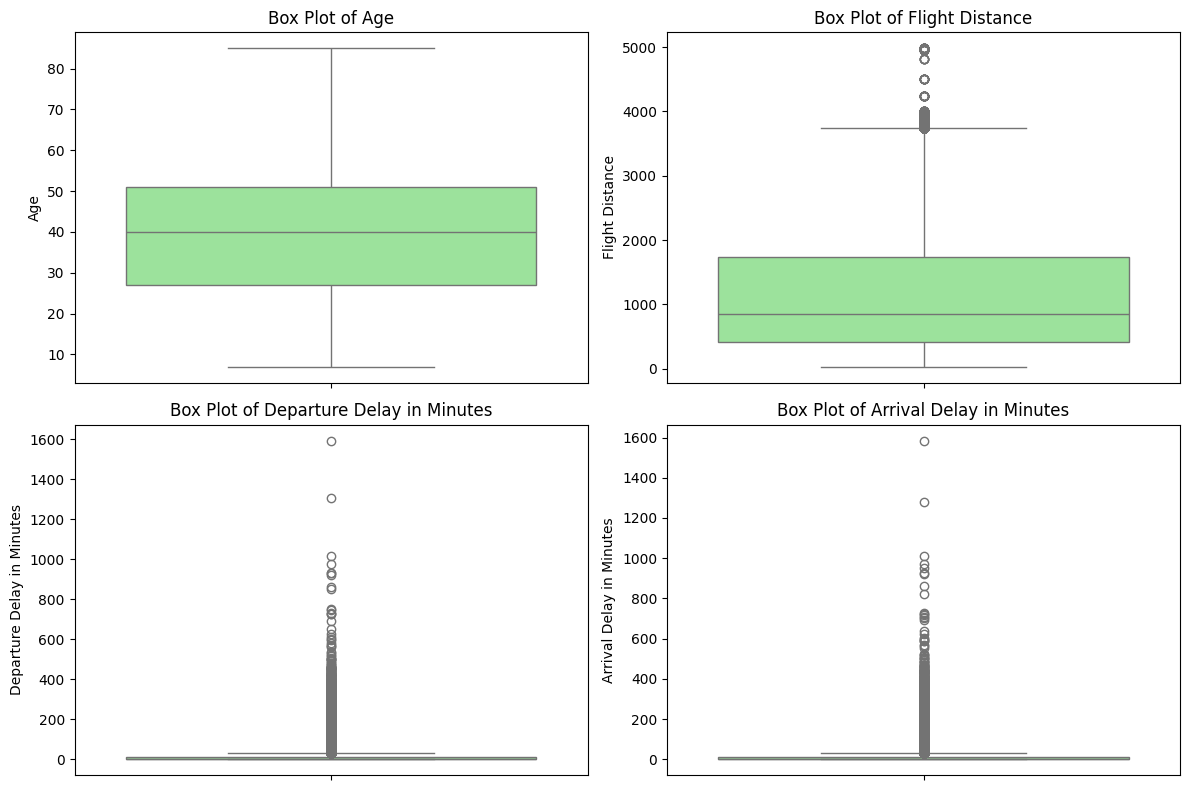

In [47]:

num_cols = ['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']
plt.figure(figsize=(12, 8))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(y=df[col], color='lightgreen')
    plt.title(f'Box Plot of {col}')
plt.tight_layout()
plt.show()

## Correlation Matrix

Correlation Matrix:
                                 Age  Flight Distance  \
Age                         1.000000         0.099461   
Flight Distance             0.099461         1.000000   
Departure Delay in Minutes -0.010152         0.002158   
Arrival Delay in Minutes   -0.012147        -0.002426   

                            Departure Delay in Minutes  \
Age                                          -0.010152   
Flight Distance                               0.002158   
Departure Delay in Minutes                    1.000000   
Arrival Delay in Minutes                      0.965481   

                            Arrival Delay in Minutes  
Age                                        -0.012147  
Flight Distance                            -0.002426  
Departure Delay in Minutes                  0.965481  
Arrival Delay in Minutes                    1.000000  


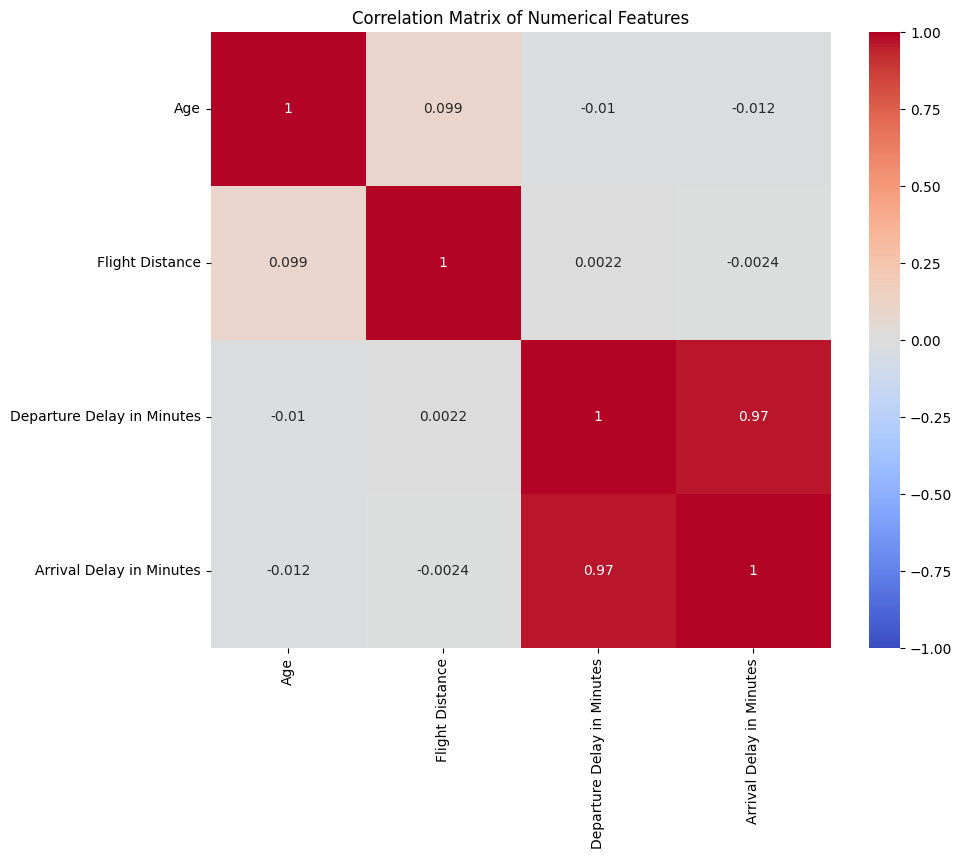

In [48]:

num_cols = ['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']
corr_matrix = df[num_cols].corr()

# Display correlation matrix
print("Correlation Matrix:")
print(corr_matrix)

# Visualize correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

## PairWise Plot for Numeric Features

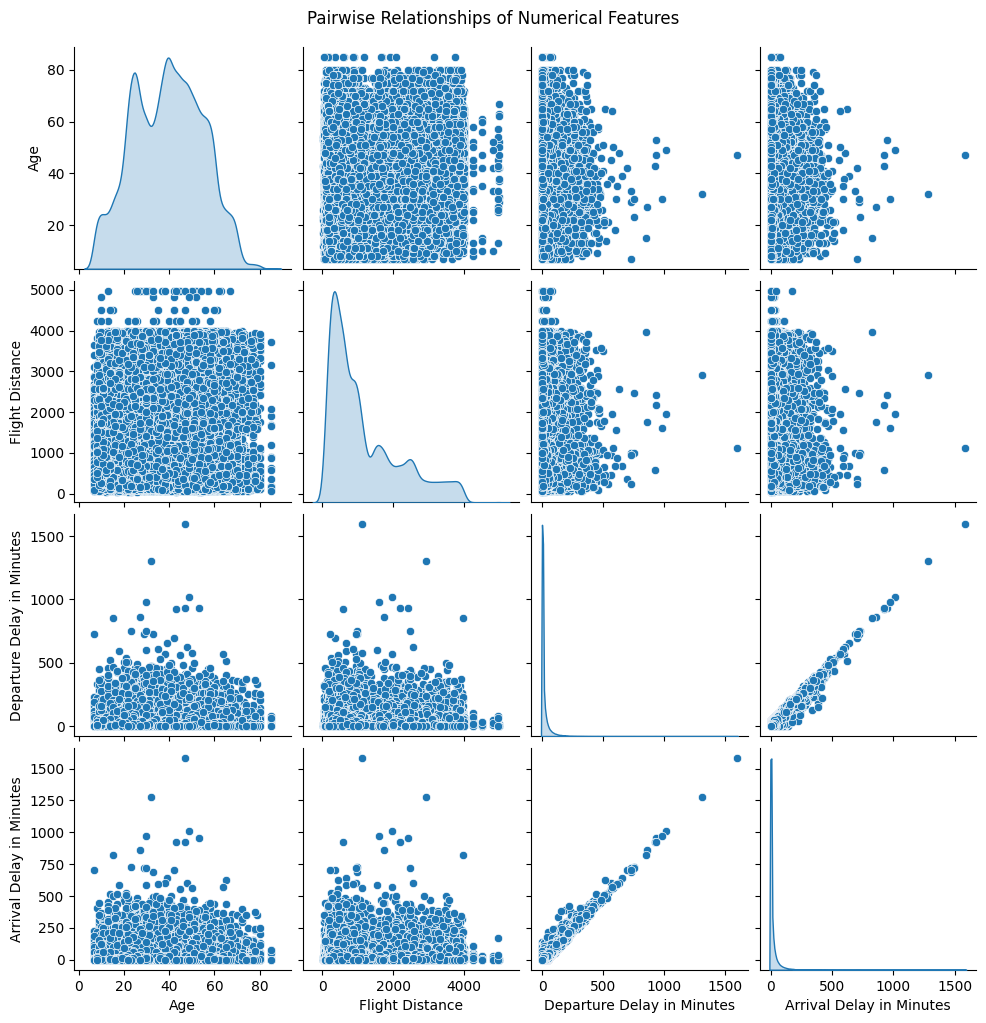

In [49]:

# Pairplot for numerical columns
num_cols = ['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']
sns.pairplot(df[num_cols], diag_kind='kde')
plt.suptitle('Pairwise Relationships of Numerical Features', y=1.02)
plt.show()

## Grouped Aggregations

Grouped Aggregations (Mean):

Grouped by Gender:
              Age  Flight Distance  Departure Delay in Minutes  \
Gender                                                           
Female  39.246762      1183.723519                   14.705085   
Male    39.516677      1195.346621                   14.929500   

        Arrival Delay in Minutes  
Gender                            
Female                 15.163592  
Male                   15.194226  

Grouped by Customer Type:
                         Age  Flight Distance  Departure Delay in Minutes  \
Customer Type                                                               
Loyal Customer     41.392497      1295.611377                   14.742673   
disloyal Customer  30.374269       714.463885                   15.141984   

                   Arrival Delay in Minutes  
Customer Type                                
Loyal Customer                    15.091800  
disloyal Customer                 15.567188  

Grouped by Type of Travel

C:\Users\Hashmi Computers\AppData\Local\Temp\ipykernel_3176\2005213980.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Class', y='Flight Distance', data=df, palette='muted')


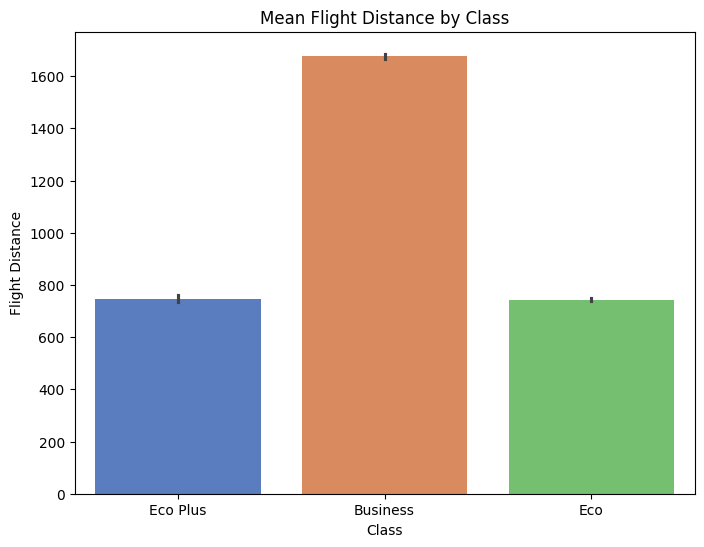

In [50]:
# Grouped aggregations by categorical columns
cat_cols = ['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction']
num_cols = ['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']

print("Grouped Aggregations (Mean):")
for cat in cat_cols:
    print(f"\nGrouped by {cat}:")
    grouped = df.groupby(cat)[num_cols].mean()
    print(grouped)

# Visualize mean Flight Distance by Class
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.barplot(x='Class', y='Flight Distance', data=df, palette='muted')
plt.title('Mean Flight Distance by Class')
plt.show()

## Trend of Departure Delay vs Age

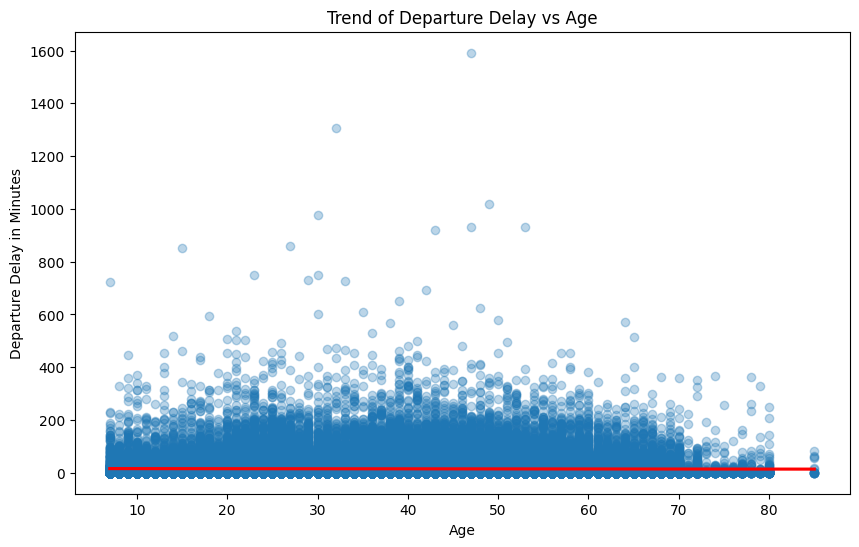

In [51]:
plt.figure(figsize=(10, 6))
sns.regplot(x='Age', y='Departure Delay in Minutes', data=df, scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
plt.title('Trend of Departure Delay vs Age')
plt.xlabel('Age')
plt.ylabel('Departure Delay in Minutes')
plt.show()

## Box Plot of service Rating by Satisfaction

C:\Users\Hashmi Computers\AppData\Local\Temp\ipykernel_3176\915035668.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='satisfaction', y=col, data=df, palette='Set2')
C:\Users\Hashmi Computers\AppData\Local\Temp\ipykernel_3176\915035668.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='satisfaction', y=col, data=df, palette='Set2')
C:\Users\Hashmi Computers\AppData\Local\Temp\ipykernel_3176\915035668.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='satisfaction', y=col, data=df, palette='Set2')
C:\Users\Hashmi Computers\AppDa

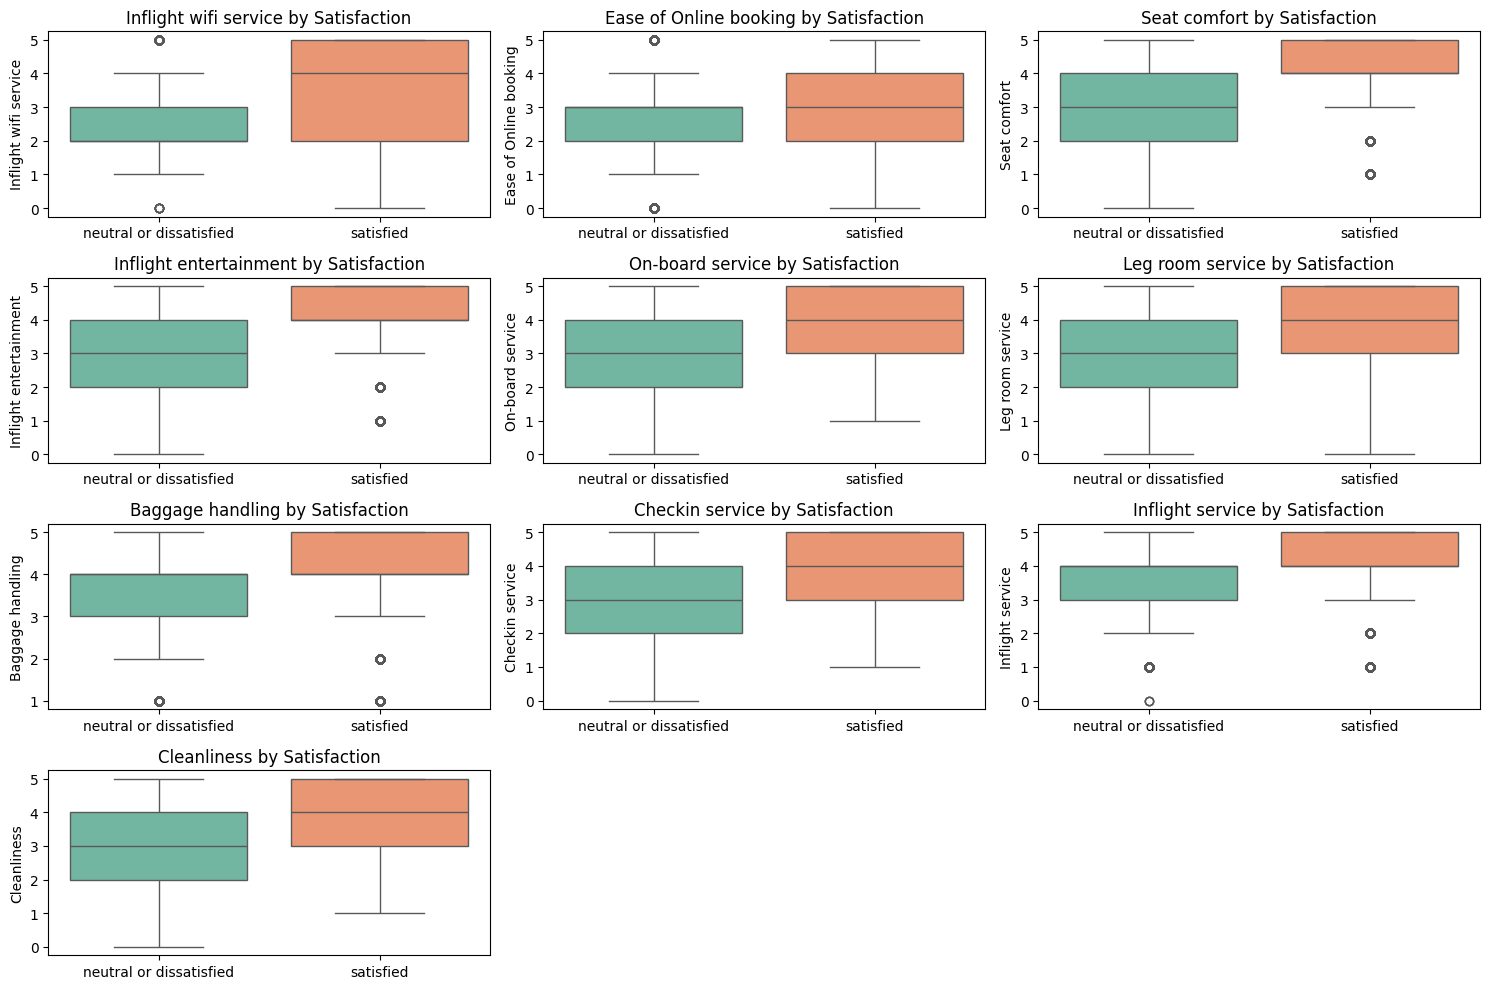

In [52]:

service_cols = ['Inflight wifi service', 'Ease of Online booking', 'Seat comfort', 'Inflight entertainment', 
                'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 
                'Inflight service', 'Cleanliness']
plt.figure(figsize=(15, 10))
for i, col in enumerate(service_cols, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(x='satisfaction', y=col, data=df, palette='Set2')
    plt.title(f'{col} by Satisfaction')
    plt.xlabel('')
plt.tight_layout()
plt.show()

## Loading testing and Training Dataset

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

## preprocessing ofData

In [54]:

columns_to_drop = ['Unnamed: 0', 'id']
train_df = train_df.drop(columns=[col for col in columns_to_drop if col in train_df.columns], errors='ignore')
test_df = test_df.drop(columns=[col for col in columns_to_drop if col in test_df.columns], errors='ignore')

# Handle missing values in 'Arrival Delay in Minutes' using mean with fillna

In [55]:
mean_arrival_delay = train_df['Arrival Delay in Minutes'].mean()
train_df['Arrival Delay in Minutes'] = train_df['Arrival Delay in Minutes'].fillna(mean_arrival_delay)
test_df['Arrival Delay in Minutes'] = test_df['Arrival Delay in Minutes'].fillna(mean_arrival_delay)

## Encode categorical variables

In [56]:
categorical_cols = ['Gender', 'Customer Type', 'Type of Travel', 'Class']
le = LabelEncoder()
for col in categorical_cols:
        train_df[col] = le.fit_transform(train_df[col])
        test_df[col] = le.transform(test_df[col])

train_df['satisfaction'] = le.fit_transform(train_df['satisfaction'])  # satisfied=1, neutral or dissatisfied=0
# Save test satisfaction for evaluation if it exists
test_satisfaction = None
if 'satisfaction' in test_df.columns:
    test_satisfaction = le.transform(test_df['satisfaction'])
    test_df = test_df.drop('satisfaction', axis=1)

## Scale Numerical Columns

In [57]:
numerical_cols = ['Age', 'Flight Distance', 'Inflight wifi service', 'Departure/Arrival time convenient',
                  'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding',
                  'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service',
                  'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness',
                  'Departure Delay in Minutes', 'Arrival Delay in Minutes']

scaler = StandardScaler()
train_df[numerical_cols] = scaler.fit_transform(train_df[numerical_cols])
test_df[numerical_cols] = scaler.transform(test_df[numerical_cols])

## Train and Test Data Split

In [58]:
X = train_df.drop('satisfaction', axis=1)
y = train_df['satisfaction']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

## Random Forest Classifier

In [59]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

## Evaluation of Model

In [60]:

y_pred_val = rf_model.predict(X_val)
print("Validation Accuracy:", accuracy_score(y_val, y_pred_val))
print("\nValidation Classification Report:\n", classification_report(y_val, y_pred_val, target_names=['neutral or dissatisfied', 'satisfied']))

Validation Accuracy: 0.9619363841971031

Validation Classification Report:
                          precision    recall  f1-score   support

neutral or dissatisfied       0.95      0.98      0.97     11713
              satisfied       0.97      0.94      0.96      9068

               accuracy                           0.96     20781
              macro avg       0.96      0.96      0.96     20781
           weighted avg       0.96      0.96      0.96     20781



## Prediction 

In [61]:
X_test = test_df
y_pred_test = rf_model.predict(X_test)
print("\nTest Accuracy:", accuracy_score(test_satisfaction, y_pred_test))
print("\nTest Classification Report:\n", classification_report(test_satisfaction, y_pred_test, target_names=['neutral or dissatisfied', 'satisfied']))




Test Accuracy: 0.9634277794887589

Test Classification Report:
                          precision    recall  f1-score   support

neutral or dissatisfied       0.96      0.98      0.97     14573
              satisfied       0.97      0.94      0.96     11403

               accuracy                           0.96     25976
              macro avg       0.96      0.96      0.96     25976
           weighted avg       0.96      0.96      0.96     25976

